In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1986.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1986,17075,371,31,3510
1,1986,17392,147,34,3513
2,1986,17969,357,17,3540
3,1986,17823,165,27,3555
4,1986,17377,19,29,3511
...,...,...,...,...,...
1872,1986,17578,391,41,3509
1873,1986,17105,262,28,3507
1874,1986,17736,59,20,3511
1875,1986,17161,335,24,3518


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1877, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1877 non-null   int64
 1   Maximum length (m))  1877 non-null   int64
 2   Recession(m),        1877 non-null   int64
 3   Rate/yr(m)           1877 non-null   int64
 4   Snout altitude (m)   1877 non-null   int64
dtypes: int64(5)
memory usage: 73.4 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1877


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1986,17075,371,31,3510
1,1986,17392,147,34,3513
2,1986,17969,357,17,3540
3,1986,17823,165,27,3555
4,1986,17377,19,29,3511


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0076,-0.0027,0.0253
"Recession(m),",NaN,0.0076,1.0000,-0.0062,-0.0379
Rate/yr(m),NaN,-0.0027,-0.0062,1.0000,0.0168
Snout altitude (m),NaN,0.0253,-0.0379,0.0168,1.0000


In [11]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0253
Recession(m),          0.0076
Rate/yr(m)            -0.0027
Year                      NaN
Name: Maximum length (m)), dtype: float64

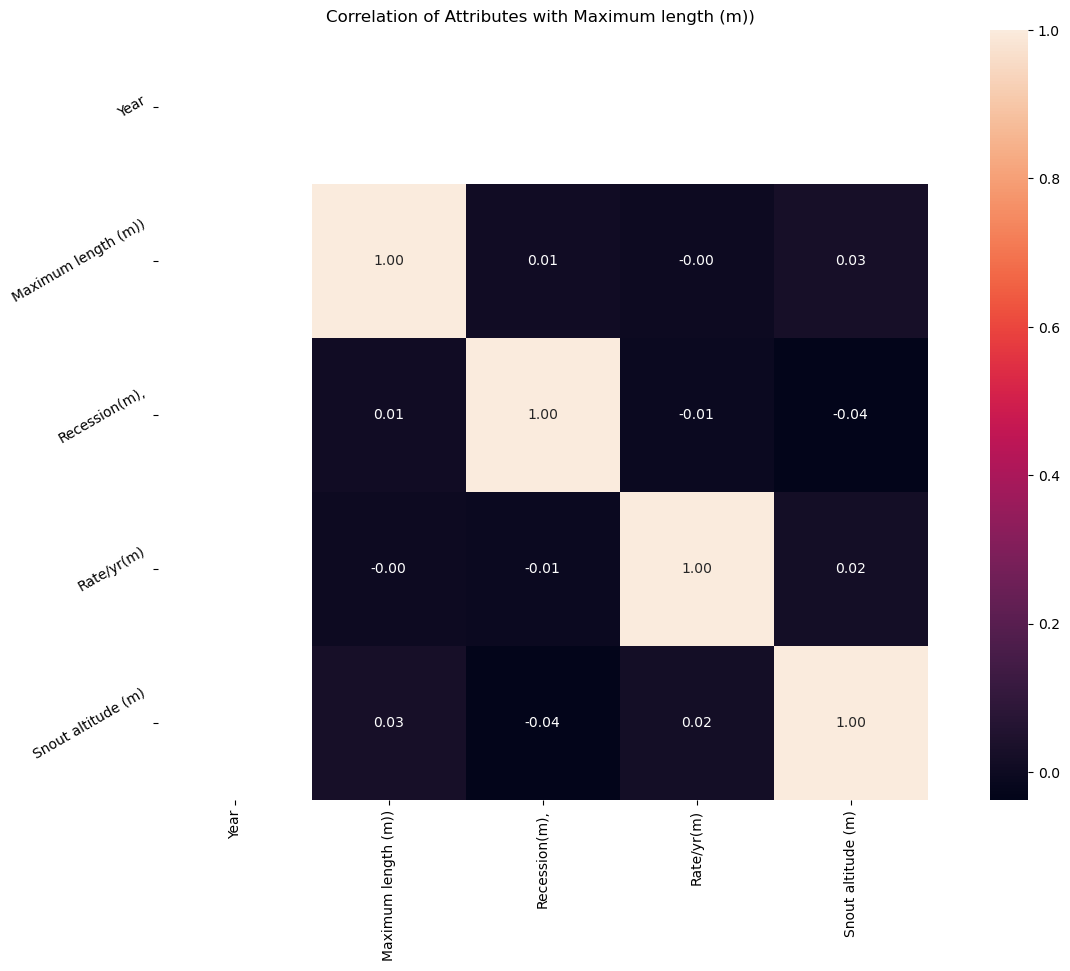

In [12]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [14]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,877.0000","1,877.0000","1,877.0000","1,877.0000","1,877.0000"
mean,"1,986.0000","17,551.1854",217.3889,27.2275,"3,531.5562"
std,0.0000,300.1888,127.0907,8.6021,20.6781
min,"1,986.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,986.0000","17,291.0000",108.0000,20.0000,"3,514.0000"
50%,"1,986.0000","17,552.0000",214.0000,27.0000,"3,532.0000"
75%,"1,986.0000","17,816.0000",329.0000,34.0000,"3,549.0000"
max,"1,986.0000","18,067.0000",439.0000,42.0000,"3,567.0000"


In [15]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1986   1.0000
Name: count, dtype: float64

Recession(m),
8     0.0059
353   0.0059
268   0.0053
130   0.0053
280   0.0053
       ...  
417   0.0005
57    0.0005
4     0.0005
331   0.0005
3     0.0005
Name: count, Length: 436, dtype: float64

Rate/yr(m)
25   0.0421
15   0.0389
19   0.0389
22   0.0378
41   0.0373
30   0.0357
35   0.0352
34   0.0352
16   0.0352
31   0.0346
29   0.0346
20   0.0346
24   0.0341
18   0.0341
42   0.0336
23   0.0336
27   0.0330
36   0.0325
14   0.0325
33   0.0325
13   0.0320
17   0.0320
32   0.0314
28   0.0314
26   0.0304
39   0.0298
37   0.0293
40   0.0277
21   0.0256
38   0.0245
Name: count, dtype: float64

Snout altitude (m)
3514   0.0229
3554   0.0208
3543   0.0192
3523   0.0181
3507   0.0181
        ...  
3551   0.0096
3548   0.0096
3526   0.0091
3530   0.0080
3496   0.0005
Name: count, Length: 72, dtype: float64



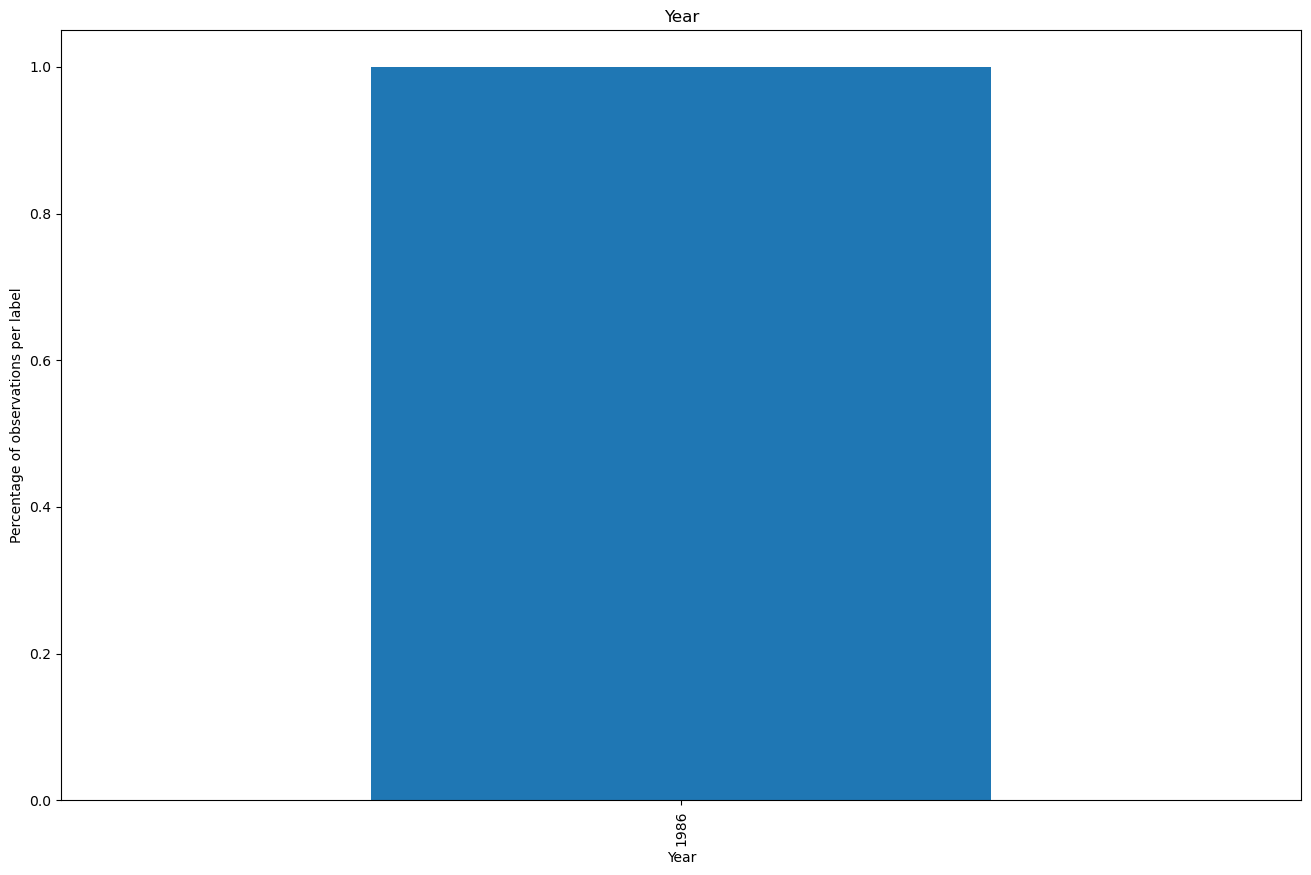

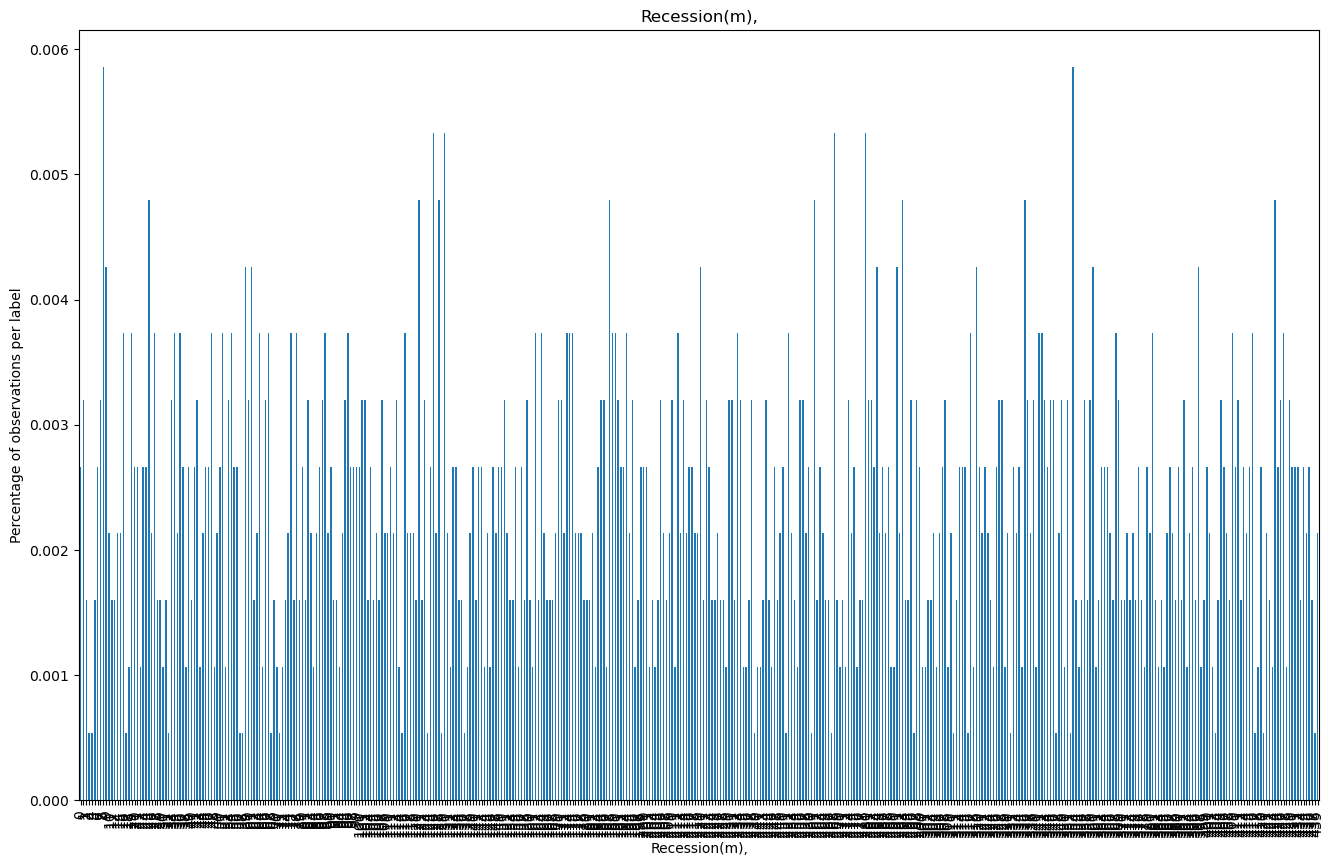

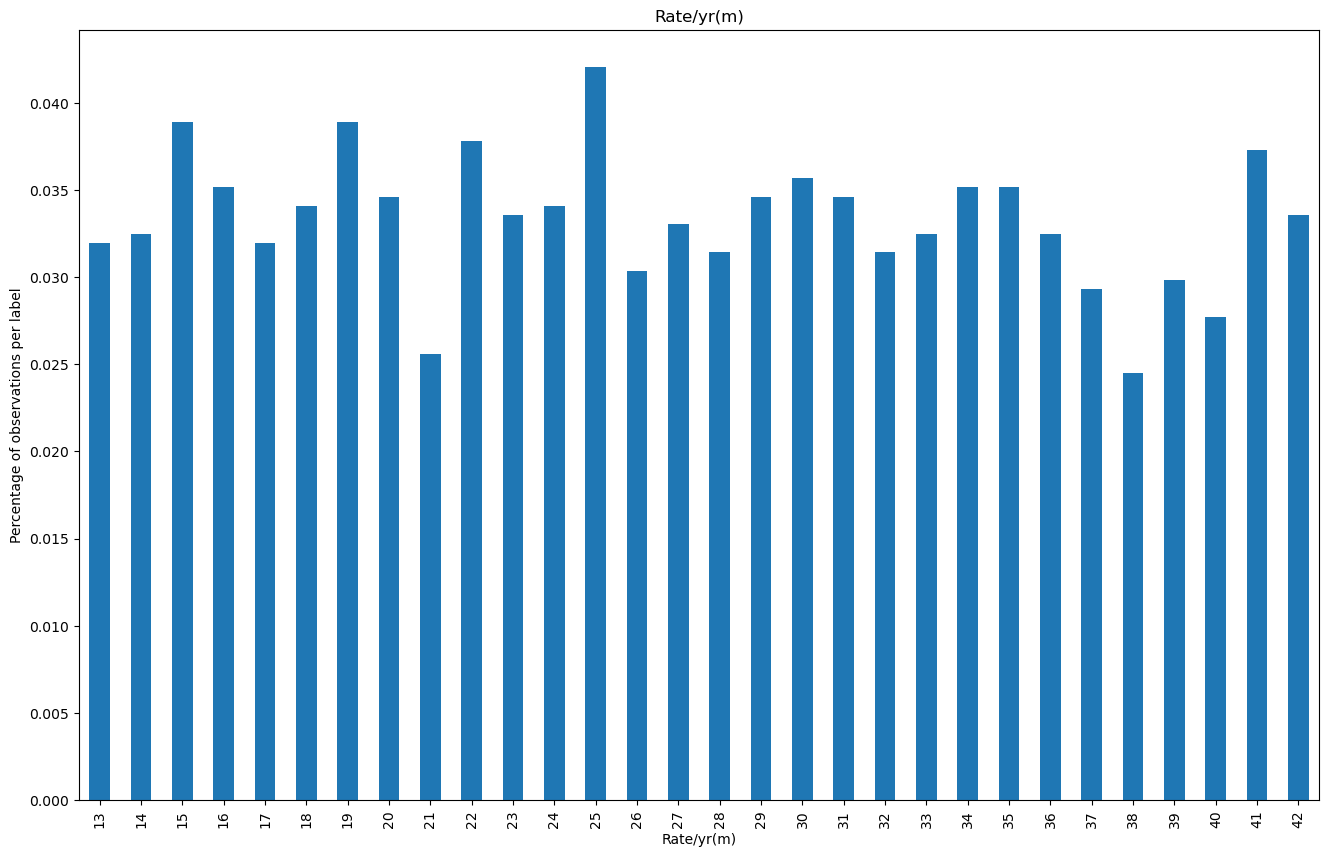

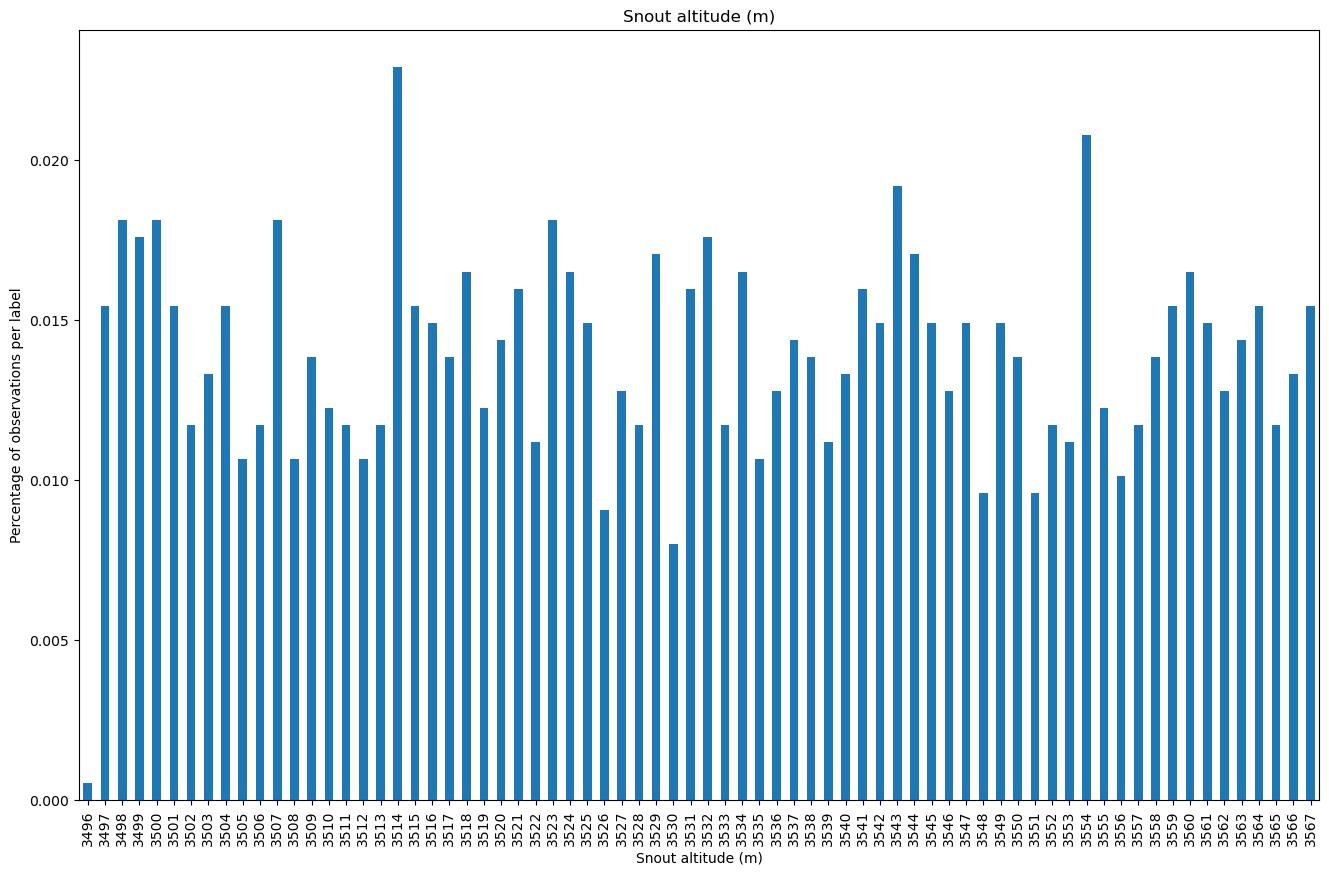

In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()